# Decision Trees in Python

### Import Libraries

In [1]:
import pandas as pd

### Get The Data. Load data "spambase_data.csv"

In [2]:
df = pd.read_csv('spambase_data.csv',header = None)
df.head() # used to display top 5 rows

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Train and Test Split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df[df.columns[:-1]]
Y = df[len(df.columns)-1]


#### Obtain X_train, X_test, Y_train, Y_test by splitting the dataset into 70-30 ratio with a random state value 30.

Note: random_state is used to control the shuffling in the split of the dataset.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30)

### Decision Trees

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

### Prediction and Evaluation

In [8]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [9]:
predictions = dtree.predict(X_test)

In [39]:
print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1083
           1       0.00      0.00      0.00       298

    accuracy                           0.78      1381
   macro avg       0.39      0.50      0.44      1381
weighted avg       0.61      0.78      0.69      1381

Confusion Matrix
[[1083    0]
 [ 298    0]]

 Accuracy
0.7842143374366402


### Tree Visualization 

In [11]:
import sklearn.tree as tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16), dpi=1024)
tree.plot_tree(dtree)
fig.savefig('decision_tree.png')

#### Q1: Create a decision stump and find the majority class in the dataset

[Text(167.4, 163.07999999999998, 'X[51] <= 0.083\ngini = 0.481\nsamples = 3220\nvalue = [1925, 1295]'),
 Text(83.7, 54.360000000000014, 'gini = 0.263\nsamples = 1833\nvalue = [1548, 285]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.396\nsamples = 1387\nvalue = [377, 1010]')]

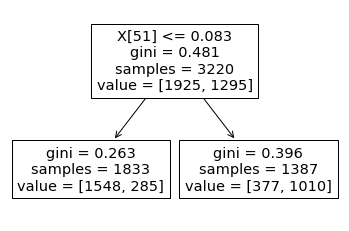

In [22]:
#### Code here ####
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30)
dtree=DecisionTreeClassifier(max_depth=1,random_state=30)
dtree=dtree.fit(X_train,Y_train)
tree.plot_tree(dtree)

Majority Class in the dataset is 0

#### Q2: Implement the decision tree classifier using entropy to measure the quality of split and random state value as 30. 
Note: The features are always randomly permuted at each split, the best found split may vary across different runs. To obtain a deterministic behaviour during fitting, random state has to be fixed to an integer.

In [26]:
dtree_entropy=DecisionTreeClassifier(criterion="entropy",random_state=30)

dtree_entropy=dtree_entropy.fit(X_train,Y_train)
predictions_entropy=dtree_entropy.predict(X_test)
print(classification_report(Y_test,predictions_entropy))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions_entropy))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       863
           1       0.90      0.86      0.88       518

    accuracy                           0.91      1381
   macro avg       0.91      0.90      0.90      1381
weighted avg       0.91      0.91      0.91      1381

Confusion Matrix
[[814  49]
 [ 75 443]]

 Accuracy
0.9217958001448225


#### Q3: Compare the two trees on the basis of their accuracy. Which tree gives better accuarcy (using gini index or entropy).

Accuracy of decision tree using gini = 0.7842143374366402
Accuracy of decision tree using entropy = 0.9217958001448225
Accuracy of entropy is higher

#### Q4: Fully grown decision trees models usually overfits the data. To overcome the problem of overfitting, pruning techniques are used. One of which is restricting the height of the tree. Find the value of the height for which the decision tree model is giving the highest accuracy. (Use entropy measure)

In [32]:
#### Code here ####
#get the maximum possible height of fully grown tree
max_height=dtree_entropy.tree_.max_depth
print(max_height)
accuracy=[]

for height in range(1,max_height+1):
    dtree_model=DecisionTreeClassifier(criterion="entropy",max_depth=height,random_state=30)
    dtree_model=dtree_model.fit(X_train,Y_train)
    predictions_model=dtree_model.predict(X_test)
    print("Height: ",height)
    print(classification_report(Y_test,predictions_model))
    print("Confusion Matrix")
    print(confusion_matrix(Y_test,predictions_model))
    print("\n Accuracy")
    print(accuracy_score(Y_test,predictions_model))
    accuracy.append(accuracy_score(Y_test,predictions_model))

frame=pd.DataFrame({'max_depth':range(1,height+1),'Accuracy':accuracy})
maxheight=frame.max()
print(maxheight)

20
Height:  1
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       863
           1       0.70      0.72      0.71       518

    accuracy                           0.78      1381
   macro avg       0.77      0.77      0.77      1381
weighted avg       0.78      0.78      0.78      1381

Confusion Matrix
[[706 157]
 [143 375]]

 Accuracy
0.782766111513396
Height:  2
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       863
           1       0.88      0.63      0.74       518

    accuracy                           0.83      1381
   macro avg       0.85      0.79      0.80      1381
weighted avg       0.84      0.83      0.82      1381

Confusion Matrix
[[820  43]
 [192 326]]

 Accuracy
0.8298334540188269
Height:  3
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       863
           1       0.88      0.77      0.82       518

    acc

#### Q5: Find the feature importance from the trained model and rebuild the model using top 10 important features only. 

In [33]:
#### Code here ####
feature_imp=dtree_entropy.feature_importances_
print(feature_imp)

[0.00000000e+00 8.25383955e-03 6.09375850e-03 0.00000000e+00
 2.04061434e-02 2.03436399e-03 1.13583734e-01 6.38747065e-03
 1.45722282e-03 2.03401402e-03 6.79777397e-03 1.28815992e-02
 1.32321407e-03 7.48170650e-03 0.00000000e+00 6.16259491e-02
 9.07155743e-03 4.08093216e-03 2.71879515e-02 0.00000000e+00
 1.38685225e-02 1.91694293e-03 7.27558185e-03 2.90822009e-03
 6.49757565e-02 1.56383980e-03 2.71695092e-02 0.00000000e+00
 1.15378904e-03 6.84578119e-04 0.00000000e+00 0.00000000e+00
 1.80138096e-03 0.00000000e+00 0.00000000e+00 1.98758011e-03
 8.01344948e-03 0.00000000e+00 0.00000000e+00 1.15378904e-03
 3.08410322e-03 2.41292985e-04 0.00000000e+00 1.87081119e-03
 1.32934971e-02 1.48772567e-02 0.00000000e+00 0.00000000e+00
 4.56366919e-03 5.24857317e-03 0.00000000e+00 2.88182500e-01
 6.40947453e-02 5.49961957e-03 3.31742714e-02 1.22209956e-01
 1.84855341e-02]


In [40]:
import heapq
top_10 = []

for ind in range(len(feature_imp)):
    heapq.heappush(top_10, (feature_imp[ind], ind))
    
top_10_imp_features = heapq.nlargest(10, top_10)

col_ids = []
for ind in range(len(top_10_imp_features)):
    col_ids.append(heapq.heappop(top_10_imp_features)[1])
    
print(col_ids)

df_dup = df.copy(deep = True)
for col in df.columns:
    if col not in col_ids:
        df_dup.drop(col, axis=1, inplace=True)

[51, 4, 26, 18, 54, 15, 52, 24, 6, 55]


In [41]:
X = df_dup[df_dup.columns[:-1]]
Y = df[len(df.columns)-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30)

dtree = DecisionTreeClassifier(criterion='entropy', random_state=30)

dtree.fit(X_train, Y_train)

predictions = dtree.predict(X_test)

print(classification_report(Y_test, predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test, predictions))
print("\n Accuracy")
print(accuracy_score(Y_test, predictions))


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1083
           1       0.59      0.64      0.61       298

    accuracy                           0.83      1381
   macro avg       0.74      0.76      0.75      1381
weighted avg       0.83      0.83      0.83      1381

Confusion Matrix
[[951 132]
 [108 190]]

 Accuracy
0.8262128892107169


#### Q6: Is there any information loss in the tree created above

Yes the accuracy has decreased which means that the features reduced were carrying important information for tree building.

#### Q7: Create 5 different random vectors of size 10 each to select the attributes from the dataset. Create 5 decision trees using the selected set of attributes in each case and calculate their accuracy.

In [1]:
#### Code here ####
for i in range(5):
    X = np.random.choice(np.arange(1, 17), 10, replace=False)
    print(X)
    X = df[df.columns[X]]
    Y = df[len(df.columns) - 1]
    print(X.head())
    dtree = DecisionTreeClassifier(criterion='entropy', random_state=30)

    dtree.fit(X_train, Y_train)

    predictions = dtree.predict(X_test)

    print(classification_report(Y_test, predictions))
    print("Confusion Matrix")
    print(confusion_matrix(Y_test, predictions))
    print("\n Accuracy")
    print(accuracy_score(Y_test, predictions))
    

NameError: name 'np' is not defined

#### Q8: Is there any decision tree you will discard and why?

No decision tree will be discarded as all of them have accuracy above 50%

#### Q9: Load data "spambase_data_2.csv". Create a decision tree using entropy. Perform its evaluation. 

In [43]:
#### Code here ####
df2 = pd.read_csv('spambase_data_2.csv',header = None)
df2.head() # used to display top 5 rows

X = df2[df2.columns[:-1]]
Y = df2[len(df2.columns)-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30)

dtree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=30)

dtree_entropy = dtree_entropy.fit(X_train, Y_train)

predictions_entropy = dtree_entropy.predict(X_test)

print(classification_report(Y_test, predictions_entropy))
print("Confusion Matrix")
print(confusion_matrix(Y_test, predictions_entropy))
print("\n Accuracy")
print(accuracy_score(Y_test, predictions_entropy))


              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1083
           1       0.60      0.61      0.61       298

    accuracy                           0.83      1381
   macro avg       0.75      0.75      0.75      1381
weighted avg       0.83      0.83      0.83      1381

Confusion Matrix
[[964 119]
 [116 182]]

 Accuracy
0.8298334540188269


#### Q10. Perform pre- pruning by restricting the height of tree and find the height at which you get highest accuracy.

In [44]:
#### Code here ####
max_height = dtree_entropy.tree_.max_depth
print(max_height)

maxHeight = 1
maxAcc = 0

for height in range(1, max_height+1):
    dtree_model = DecisionTreeClassifier(criterion='entropy', max_depth=height, random_state=30)
    dtree_model = dtree_model.fit(X_train, Y_train)
    predictions_model = dtree_model.predict(X_test)
    print("height:", height)
    print(classification_report(Y_test, predictions_model))
    print("Confusion Matrix")
    print(confusion_matrix(Y_test, predictions_model))
    print("\n Accuracy")
    acc_score = accuracy_score(Y_test, predictions_model);
    print(acc_score)
    if (acc_score > maxAcc):
        maxHeight = height
        maxAcc = acc_score
        
print("maximum height: ", maxHeight)
print("maximum accuracy: ", maxAcc)

37
height: 1
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1083
           1       0.00      0.00      0.00       298

    accuracy                           0.78      1381
   macro avg       0.39      0.50      0.44      1381
weighted avg       0.61      0.78      0.69      1381

Confusion Matrix
[[1083    0]
 [ 298    0]]

 Accuracy
0.7842143374366402
height: 2
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1083
           1       0.48      0.57      0.52       298

    accuracy                           0.77      1381
   macro avg       0.68      0.70      0.69      1381
weighted avg       0.79      0.77      0.78      1381

Confusion Matrix
[[899 184]
 [128 170]]

 Accuracy
0.7740767559739319
height: 3
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1083
           1       0.52      0.69      0.59       298

    a

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[899 184]
 [ 88 210]]

 Accuracy
0.8030412744388125
height: 7
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1083
           1       0.54      0.73      0.62       298

    accuracy                           0.81      1381
   macro avg       0.73      0.78      0.75      1381
weighted avg       0.84      0.81      0.82      1381

Confusion Matrix
[[900 183]
 [ 81 217]]

 Accuracy
0.8088341781317886
height: 8
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1083
           1       0.54      0.73      0.63       298

    accuracy                           0.81      1381
   macro avg       0.73      0.78      0.75      1381
weighted avg       0.84      0.81      0.82      1381

Confusion Matrix
[[900 183]
 [ 79 219]]

 Accuracy
0.8102824040550326
height: 9
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1083
           1  

height: 29
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1083
           1       0.58      0.60      0.59       298

    accuracy                           0.82      1381
   macro avg       0.73      0.74      0.74      1381
weighted avg       0.82      0.82      0.82      1381

Confusion Matrix
[[953 130]
 [119 179]]

 Accuracy
0.8196958725561188
height: 30
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1083
           1       0.60      0.64      0.62       298

    accuracy                           0.83      1381
   macro avg       0.75      0.76      0.75      1381
weighted avg       0.83      0.83      0.83      1381

Confusion Matrix
[[954 129]
 [107 191]]

 Accuracy
0.8291093410572049
height: 31
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1083
           1       0.58      0.61      0.59       298

    accur

#### Q11: Is there any difference between precision and accuracy you get in Q4 and Q10.

Yes accuracy in Q4 is higher than accuracy in Q10